<a href="https://colab.research.google.com/github/Junedaktar/Capstone-project-2-Sales-data-prediction/blob/main/Retail_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Rossman Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 - Juned Akhtar
##### **Team Member 2 - Muskan Garg

# **Project Summary -**

We have a time series forecasting problem where we need to predict the "Sales" column for the test set. We have historical sales data for 1,115 Rossmann stores, and We need to use this data to train a model that can predict sales for the next six weeks in advance.

Given the nature of the problem, there are several ways to solve this. By this we can capture the trends, seasonality, and other time-dependent patterns that affect the sales of Rossmann stores.

To get started, We can explore the dataset to understand the features and their relationships with the target variable. We can also perform data cleaning and preprocessing to handle missing data, outliers, and other issues that may affect the performance of our model.

Once we clean and preprocess the data, we can train our model using a training set and evaluate its performance using a validation set. We can then use the trained model to make predictions on the test set and submit it to the competition.

There are many factors that can influence store sales, including promotions, competition, holidays, seasonality, and location. With so many different factors to consider, it can be challenging to accurately predict sales, especially when each store has its unique circumstances.

To make matters more complicated, some stores in the dataset are temporarily closed for refurbishment, which will need to be taken into account when making predictions.

To tackle this task, we need to use data analysis and machine learning techniques to build a model that can accurately predict sales for each store. We will need to explore the data to identify trends and patterns that may be useful for making predictions, and then use this information to train and test our model.

Ultimately, our goal is to create a model that can accurately predict sales for each store, even when faced with a wide range of different factors that can influence sales. By doing so, we can help Rossmann make better business decisions and improve their overall performance.


# **GitHub Link -**

https://github.com/Junedaktar/Capstone-project-2-Sales-data-prediction.git

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [145]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

### Dataset Loading

In [146]:
# Load Dataset
store_df=pd.read_csv('/content/store.csv')
rossman = pd.read_csv('/content/Rossmann Stores Data.csv')
store_df

<ipython-input-146-c2b6c2db069d>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman = pd.read_csv('/content/Rossmann Stores Data.csv')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [147]:
rossman

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Dataset First View

In [148]:
# Dataset First Look
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [149]:
rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [150]:
# Dataset Rows & Columns 
store_df.shape

(1115, 10)

In [151]:
rossman.shape

(1017209, 9)

### Dataset Information

In [152]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [153]:
rossman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [154]:
# Dataset Duplicate Value Count
store_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [155]:
rossman.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

#### Missing Values/Null Values

In [156]:
# Missing Values/Null Values Count
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [157]:
rossman.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [158]:
# Visualizing the missing values
store_df.isnull()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,True,True,True
1112,False,False,False,False,True,True,False,True,True,True
1113,False,False,False,False,True,True,False,True,True,True


In [159]:
rossman.isnull()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1017204,False,False,False,False,False,False,False,False,False
1017205,False,False,False,False,False,False,False,False,False
1017206,False,False,False,False,False,False,False,False,False
1017207,False,False,False,False,False,False,False,False,False


### What did you know about your dataset?

Based on the information provided, It can be considered that the dataset we are working with contains historical sales data for 1,115 Rossmann stores. The data include information about the stores, such as their location, size, and age, as well as details about the sales, such as the date and amount of each sale. The dataset is being used to train and test the machine learning model to predict sales for each store up to six weeks in advance.

## ***2. Understanding Your Variables***

In [160]:
# Dataset Columns
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [161]:
rossman.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [162]:
# Dataset Describe
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [163]:
rossman.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [164]:
# Check Unique Values for each variable
rossman['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [165]:
data=pd.merge(rossman,store_df,on='Store',how='left')

In [166]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

## 3. ***Data Wrangling***

### 1. Competition distance

In [168]:
data[pd.isnull(data['CompetitionDistance'])]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [169]:
data['CompetitionDistance'].fillna(data['CompetitionDistance'].mean(), inplace = True)

### 2. CompetitionOpenSinceMonth

In [170]:
# Write your code to make your dataset analysis ready.
data['CompetitionOpenSinceMonth']=data['CompetitionOpenSinceMonth'].fillna(0)

In [171]:
data['CompetitionOpenSinceYear']=data['CompetitionOpenSinceYear'].fillna(0)

In [172]:
data['Promo2SinceWeek']=data['Promo2SinceWeek'].fillna(0)

In [173]:
data['Promo2SinceYear']=data['Promo2SinceYear'].fillna(0)

In [174]:
data['PromoInterval']=data['PromoInterval'].fillna(0)

In [175]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


3. State Holiday

In [176]:
data.loc[data['StateHoliday'] == '0', 'StateHoliday'] = 0
data.loc[data['StateHoliday']=='a','StateHoliday']=1
data.loc[data['StateHoliday']=='b','StateHoliday']=2
data.loc[data['StateHoliday']=='c','StateHoliday']=3
data['StateHoliday']=data['StateHoliday'].astype('int')

In [177]:
data.loc[data['StoreType'] == 'a', 'StoreType']= 0
data.loc[data['StoreType'] == 'b', 'StoreType'] = 1
data.loc[data['StoreType'] == 'c', 'StoreType'] = 2
data.loc[data['StoreType'] == 'd', 'StoreType'] = 3
data['StoreType'] = data['StoreType'].astype('int')


In [178]:
data.loc[data['Assortment'] == 'a', 'Assortment']= 0
data.loc[data['Assortment'] == 'b', 'Assortment']= 1
data.loc[data['Assortment'] == 'c', 'Assortment']= 2
data['Assortment']=data['Assortment'].astype('int')

In [179]:
data['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [180]:
data['Date'] = pd.to_datetime(data['Date'], format= '%Y-%m-%d')
data['CompetitionOpenSinceYear']= data['CompetitionOpenSinceYear'].astype(int)
data['Promo2SinceYear']= data['Promo2SinceYear'].astype(int)
data['CompetitionDistance']= data['CompetitionDistance'].astype(int)
data['Promo2SinceWeek']= data['Promo2SinceWeek'].astype(int)
data['CompetitionOpenSinceMonth'] =data['CompetitionOpenSinceMonth'].astype(int)

In [181]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,4,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880,4,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260,0,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870,0,0,0,0,0,0


### What all manipulations have you done and insights you found?

1. In competition distance thereare 2642 null values, so we can replace with Mean, Median or Zero. But in this case, distnce can not be zero, so we will replace with Mean value.


2. In CompetitionOpenSinceMonth, CompetitionOpenSinceYesr, Promo2 since week and promo2 since year, PromoInterval have many nulll data. we can replace with Mean, Median or Zero. But in this case, we will replace with Zero.

3. StateHoliday, StoreType and assortment are categorised with a,b,c. So for model we replace with integer 0,1,2,3.

4. Some columns have string and float data type so i changed to the integer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since month')

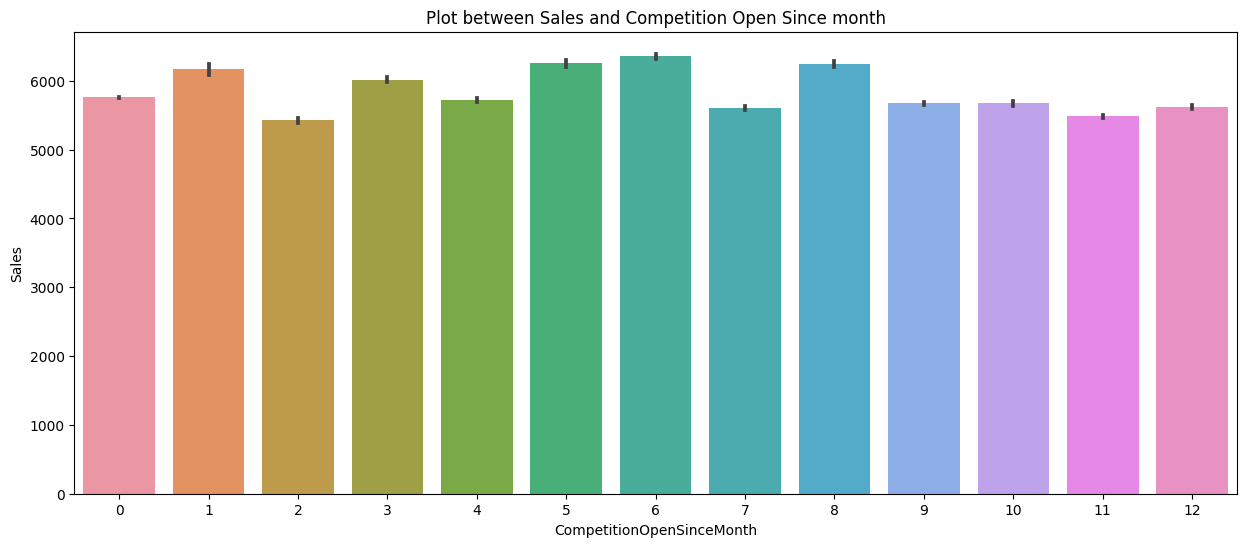

In [182]:
# Chart - 1 visualization code
plt.figure(figsize=(15,6))
sns.barplot(x=data['CompetitionOpenSinceMonth'],y=data['Sales'])
plt.title('Plot between Sales and Competition Open Since month')

##### 1. Why did you pick the specific chart?

Here we have used the barplot to showcase the relation between the sales and competition open since month. With this it becomes easy to identify that what was the sales in a particular month .

#### Chart - 2

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

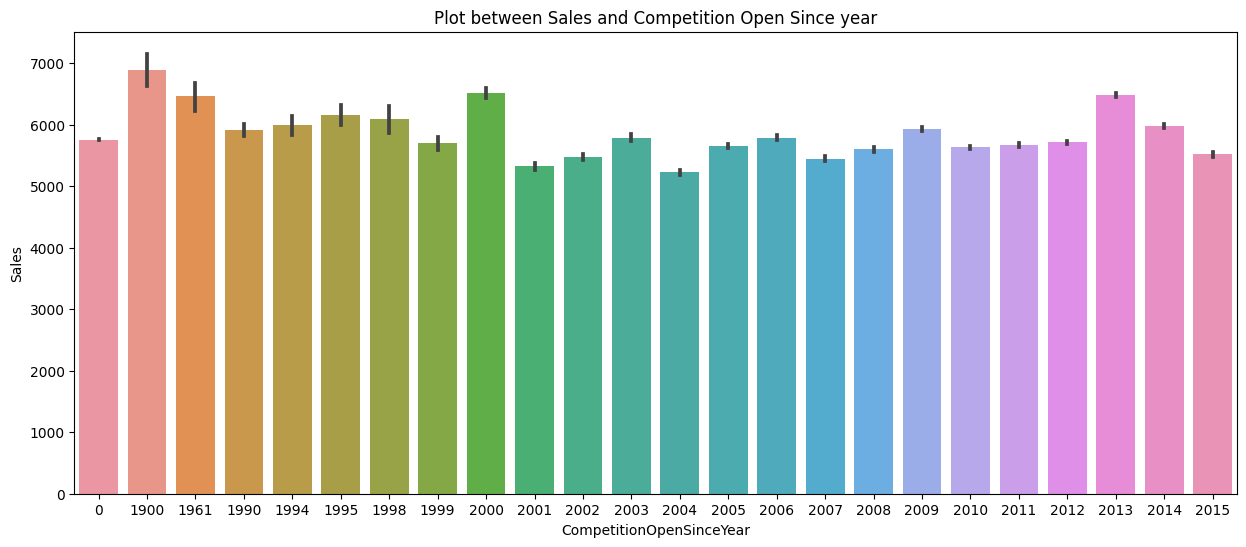

In [183]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
sns.barplot(x=data['CompetitionOpenSinceYear'],y=data['Sales'])
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

In this graph, the relation between sales and competition open since year is shown. This shows that the highest sales happen was in the year 1900 and then again in year 2013.

#### Chart - 3

Text(0.5, 1.0, 'Plot between Sales and promo2 since week')

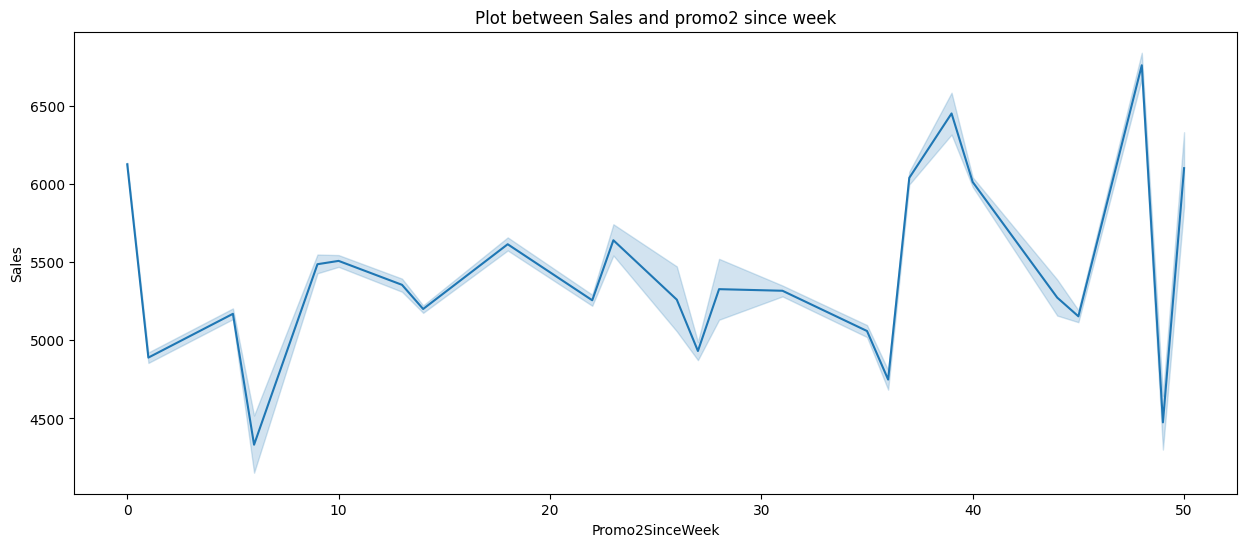

In [184]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
sns.lineplot(x=data['Promo2SinceWeek'],y=data['Sales'])
plt.title('Plot between Sales and promo2 since week')

##### 1. Why did you pick the specific chart?

This lineplot chart shows the relation between sales and promo2 since week. 

##### 2. What is/are the insight(s) found from the chart?

This clearly shows that the highest sales happen between the 40th and the 50th week. 

#### Chart - 4

Text(0.5, 1.0, 'Plot between Sales and promo2 since year')

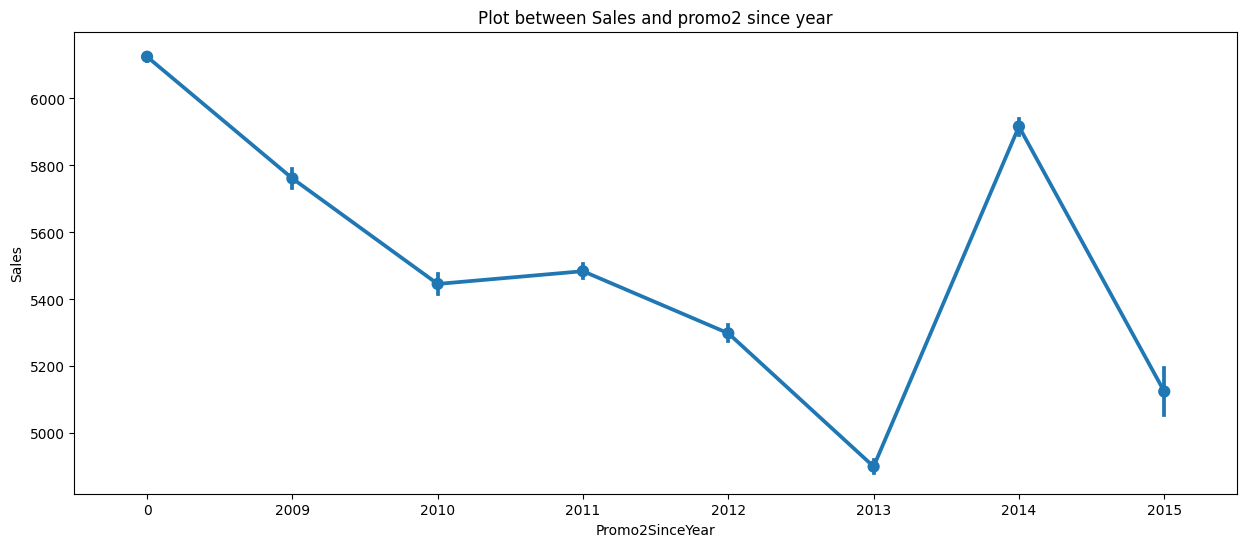

In [185]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x=data['Promo2SinceYear'],y=data['Sales'])
plt.title('Plot between Sales and promo2 since year')

#### Chart - 5

Text(0.5, 1.0, 'Plot between Sales and day of week')

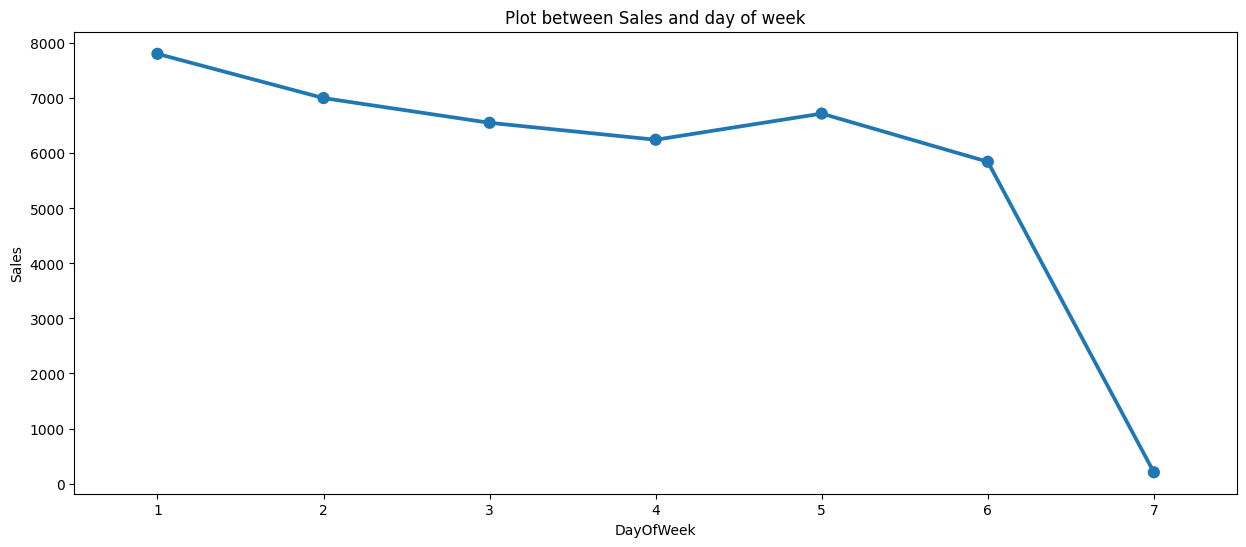

In [186]:
# Chart - 5 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=data)
plt.title('Plot between Sales and day of week')

##### 1. Why did you pick the specific chart?

This pointplot chart shows the relation between sales and days of week. 

##### 2. What is/are the insight(s) found from the chart?

This pointplot easily explains that the sale was high in the starting days of the week and then falls down at the last day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By this chart, we can conclude that sales has the high demand in the beginning of the week so this is the right time to invite more customers which can be one via advertisement, sale, discounts.

#### Chart - 6

Text(0.5, 1.0, 'comparision between assortment and sales')

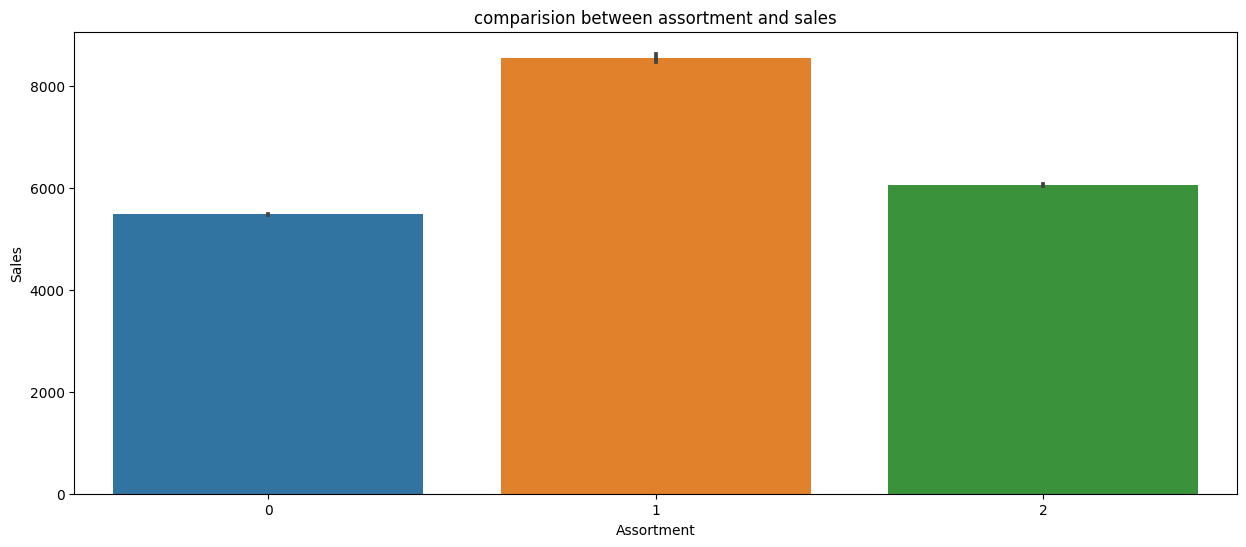

In [187]:
# Chart - 6 visualization code
plt.figure(figsize=(15,6))
sns.barplot(x=data['Assortment'],y=data['Sales'])
plt.title('comparision between assortment and sales')

##### 1. Why did you pick the specific chart?

Barplot between promo and Sales shows the effect of promotion on Sales. 

##### 2. What is/are the insight(s) found from the chart?

Here 0 represents the store which didnt opt for promotion and 1 & 2 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.



#### Chart - 7

Text(0.5, 1.0, 'comparison between store sales')

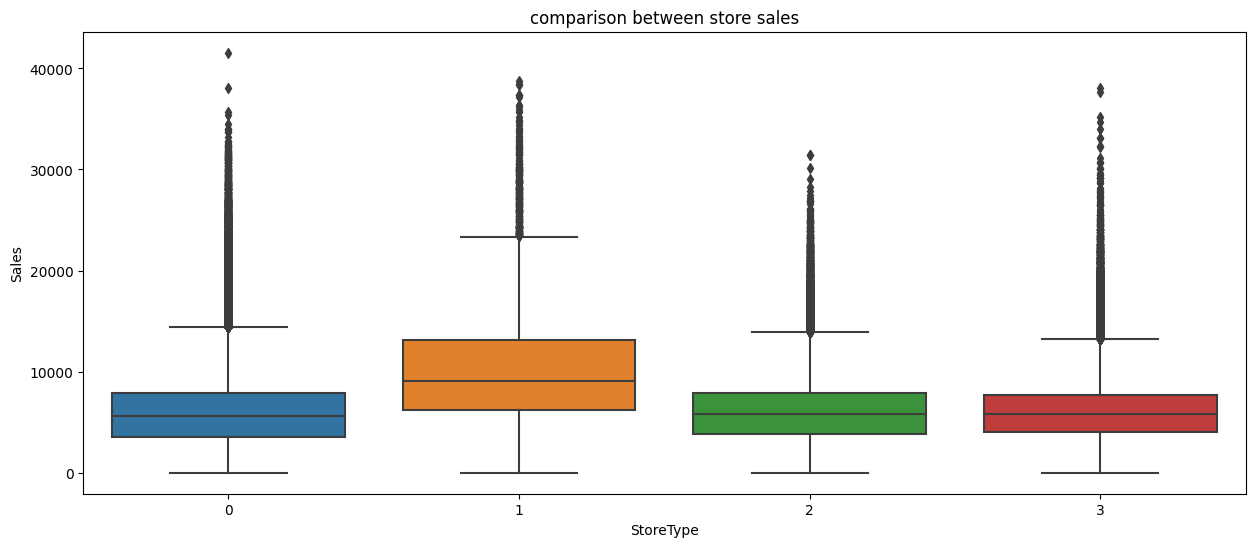

In [188]:
# Chart - 7 visualization code
plt.figure(figsize=(15,6))
sns.boxplot(x=data['StoreType'],y=data['Sales'])
plt.title('comparison between store sales')

##### 1. Why did you pick the specific chart?

Box plot help to show the outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

There are many outliers in the store data.

#### Chart - 8

<Axes: xlabel='StateHoliday', ylabel='Sales'>

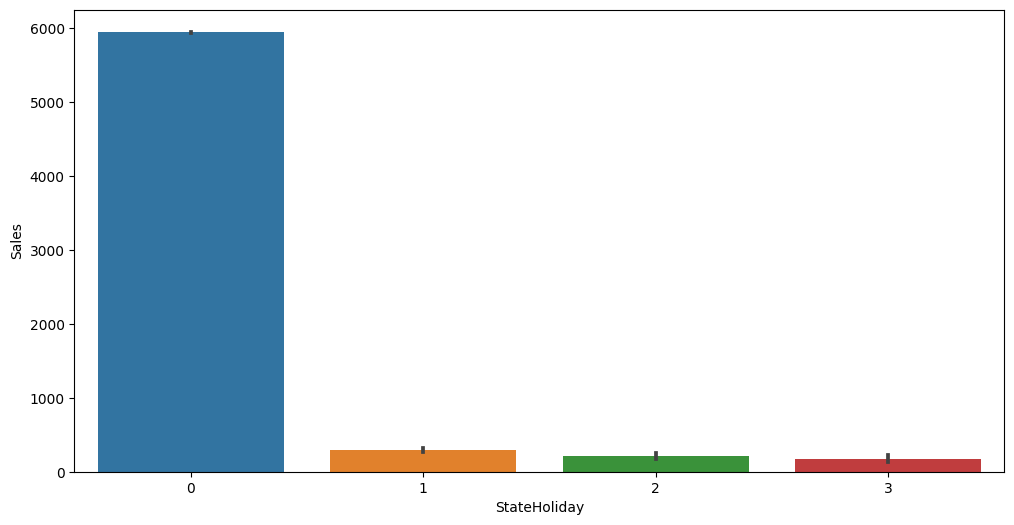

In [189]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.barplot(x="StateHoliday", y="Sales", data=data)

##### 1. Why did you pick the specific chart?

This chart is easy to understand the sales during the state holidays.

##### 2. What is/are the insight(s) found from the chart?

This shows the Sales during state holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe that sales are incresing masively during the holiday.

#### Chart - 9

<Axes: >

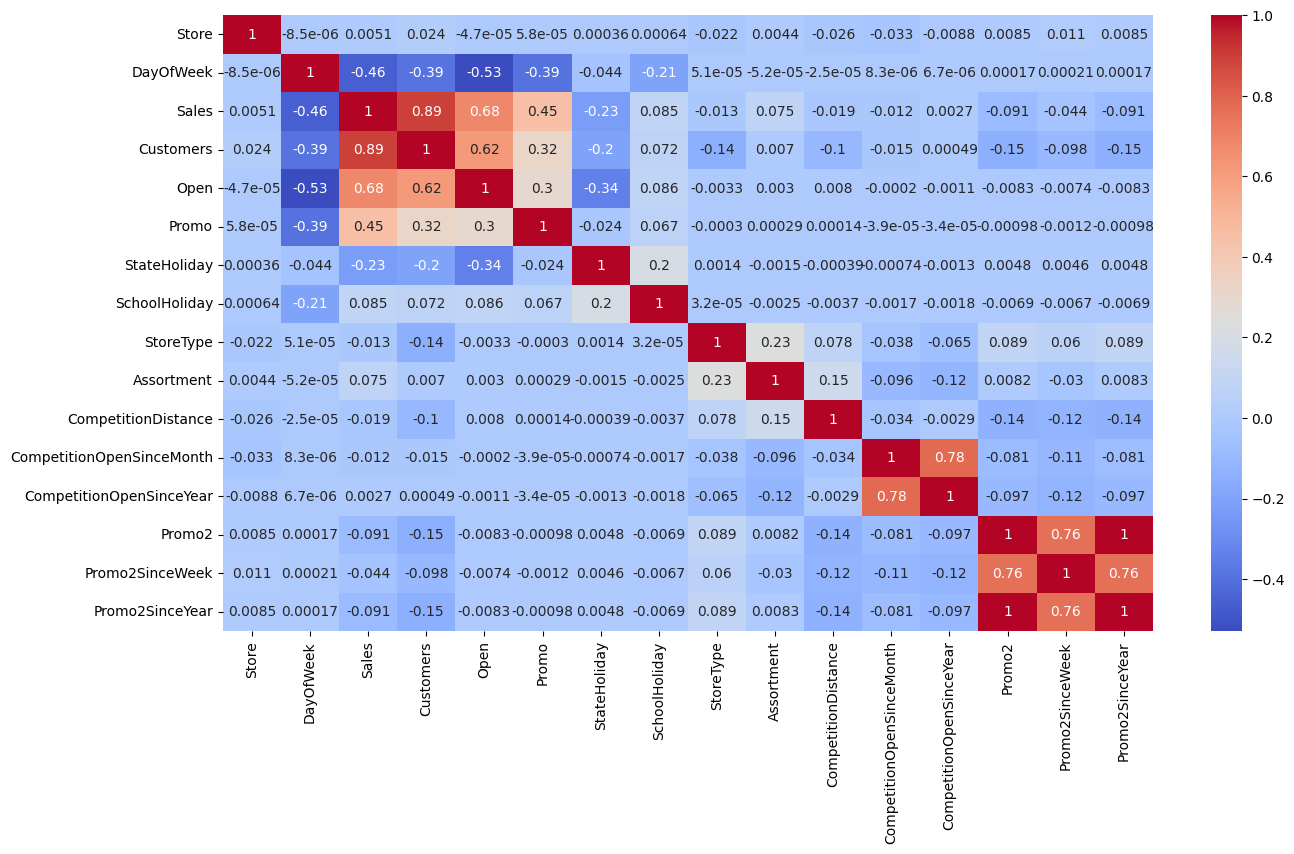

In [190]:
# Chart - 9 visualization code
plt.figure(figsize=(15,8))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis.

##### 2. What is/are the insight(s) found from the chart?

This heatmap shows the multi - collinearity of of the sales data.

## ***5. Feature Engineering & Data Pre-processing***

###1. Correlation

In [191]:
dependent='Sales'
not_needed=('Store','Date','StoreType','PromoInterval')
independent=list(set(data.columns.tolist())-set(not_needed)-{dependent})

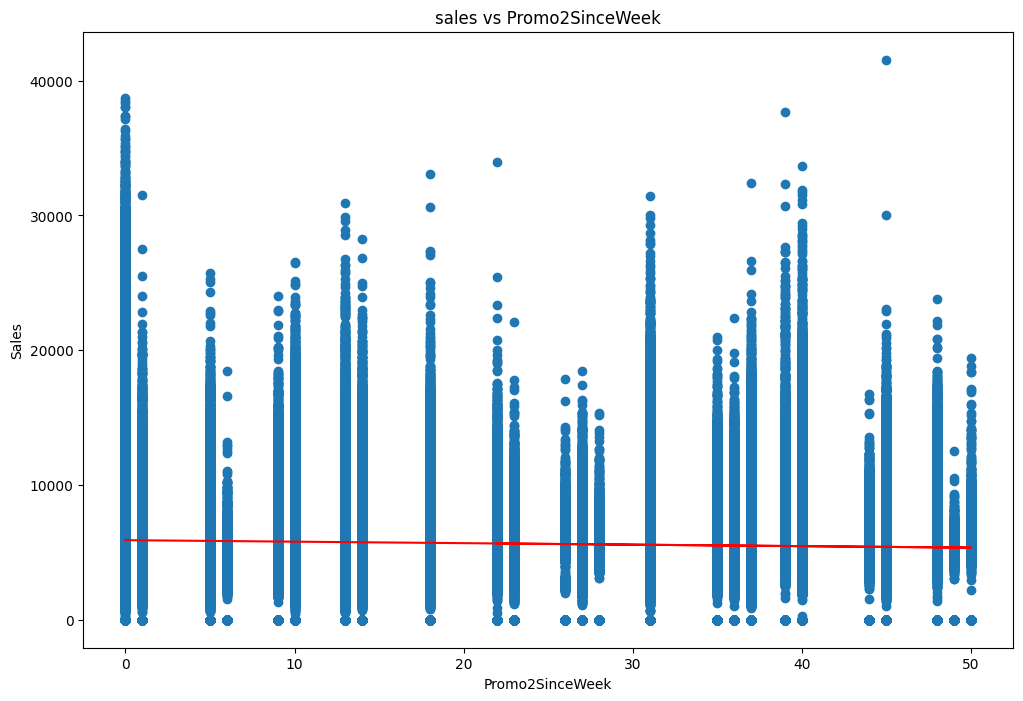

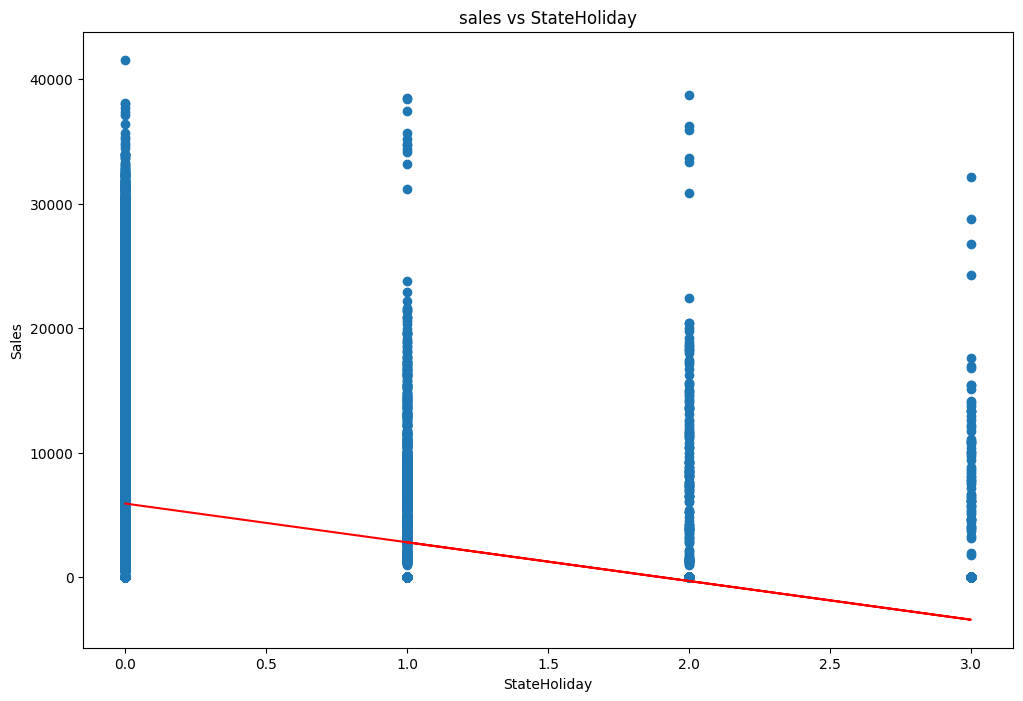

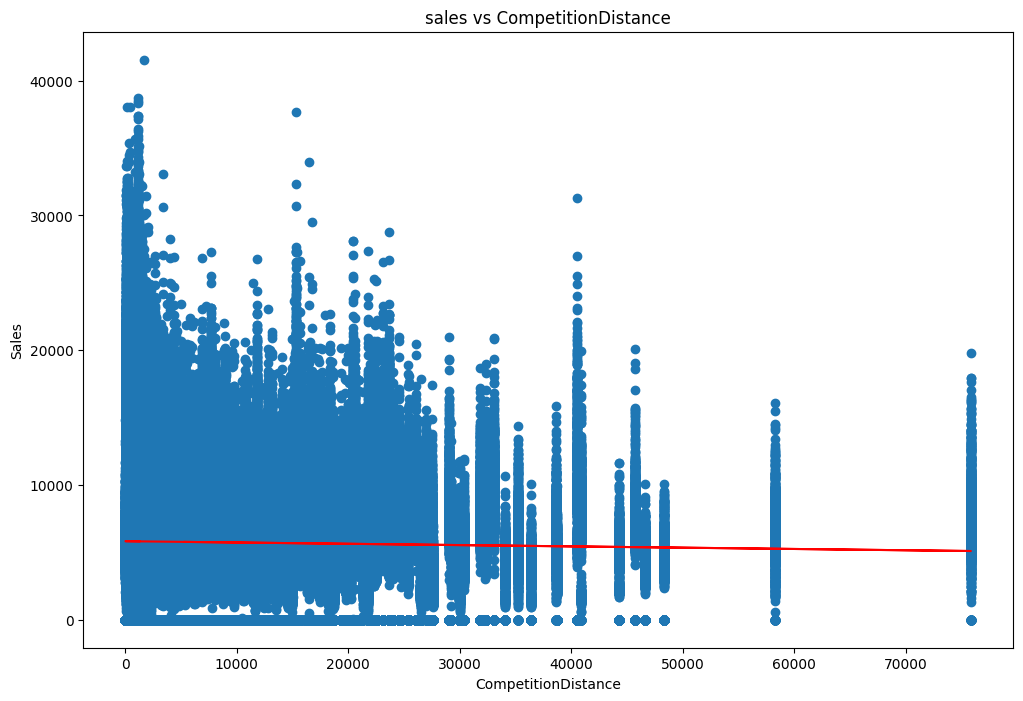

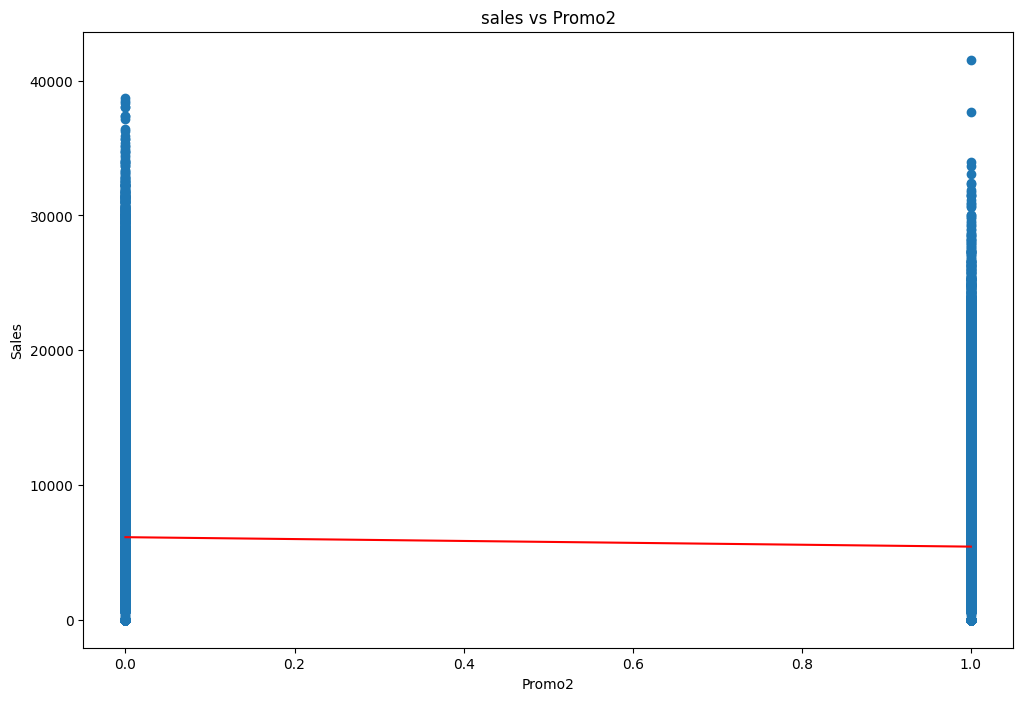

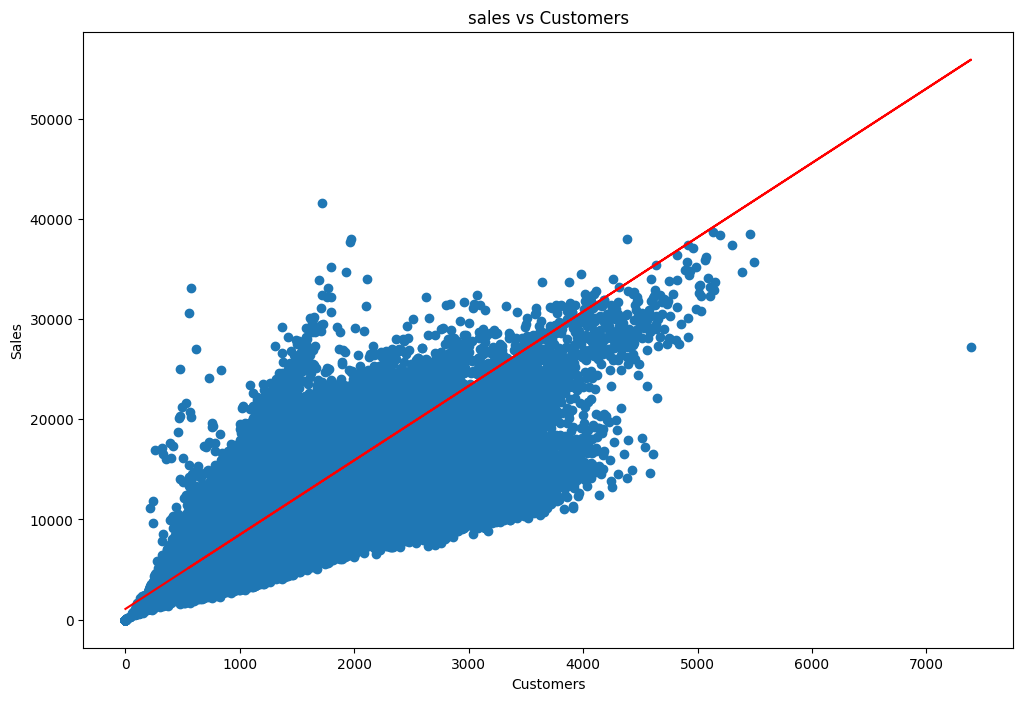

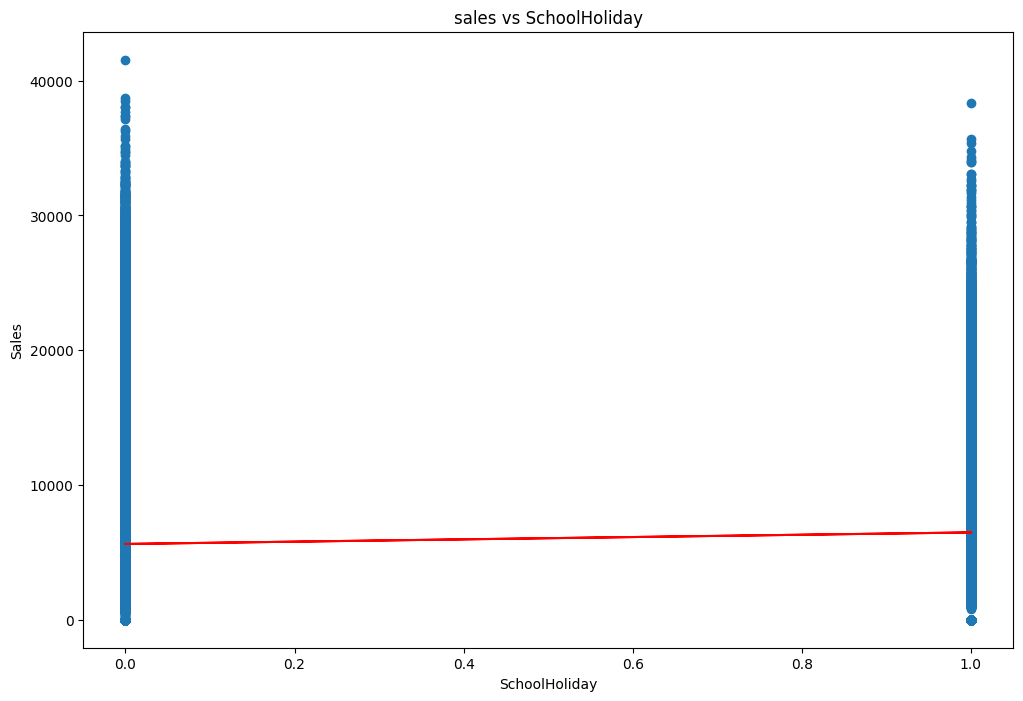

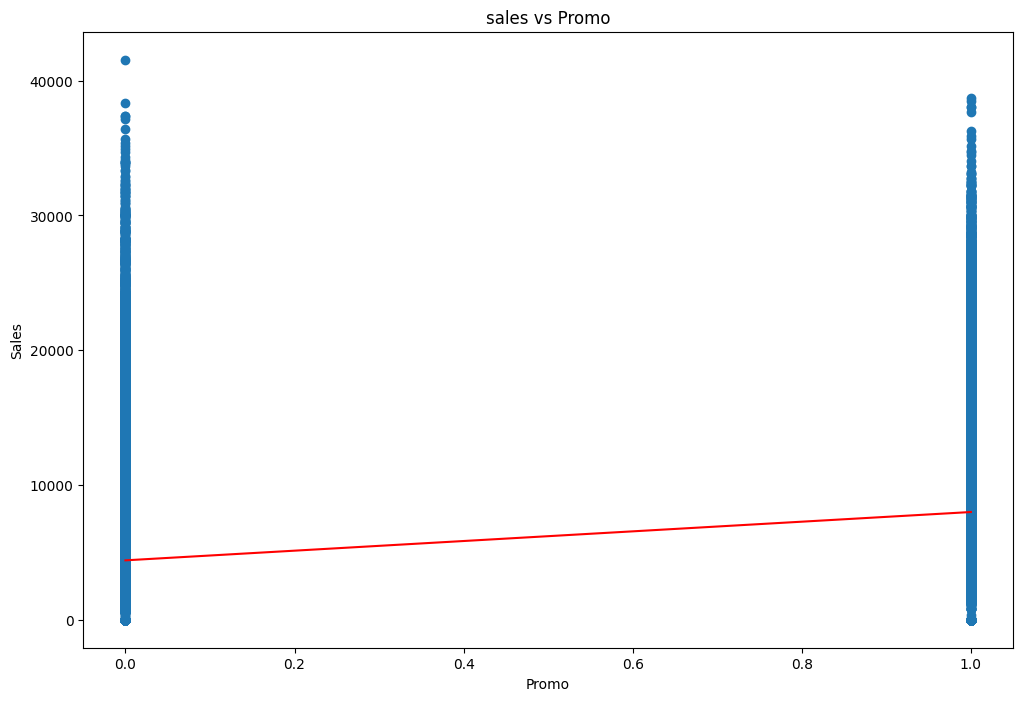

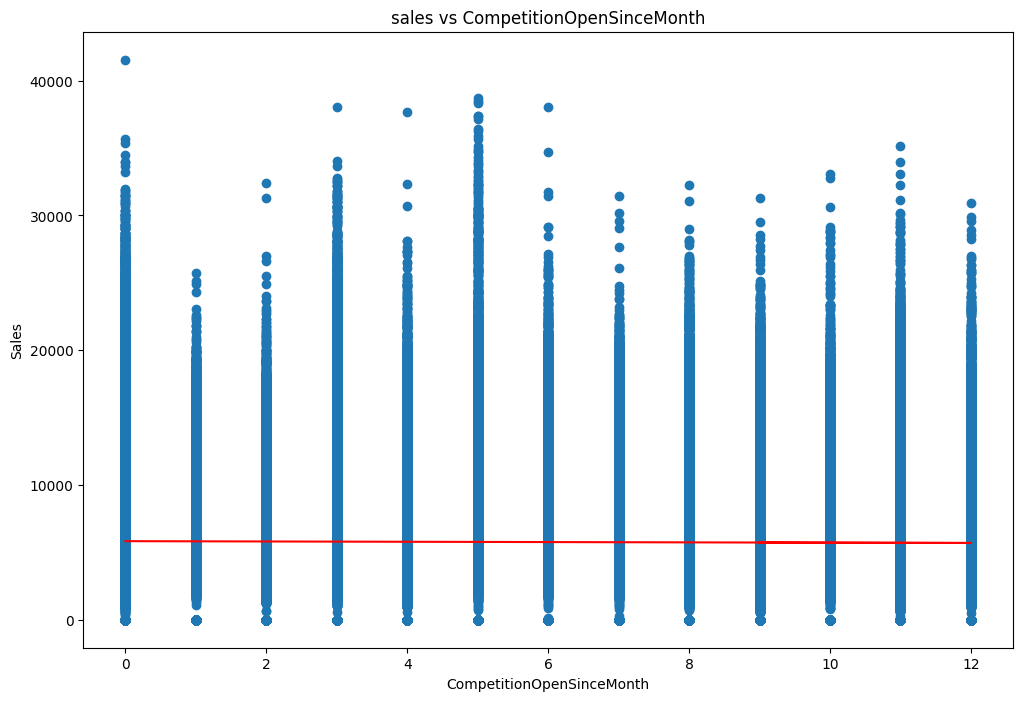

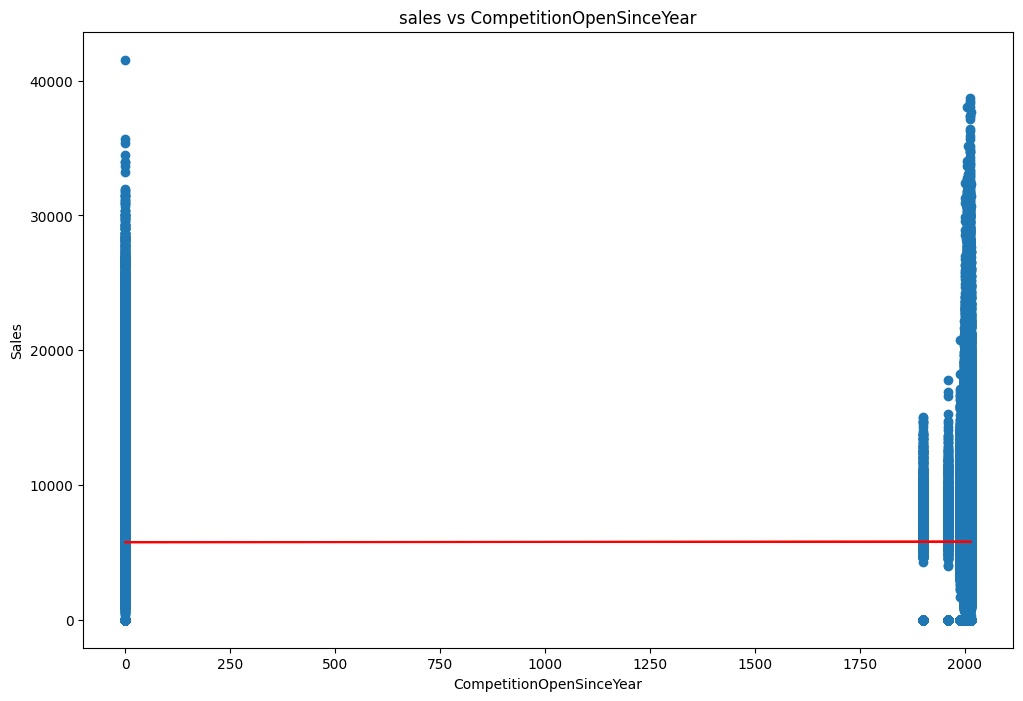

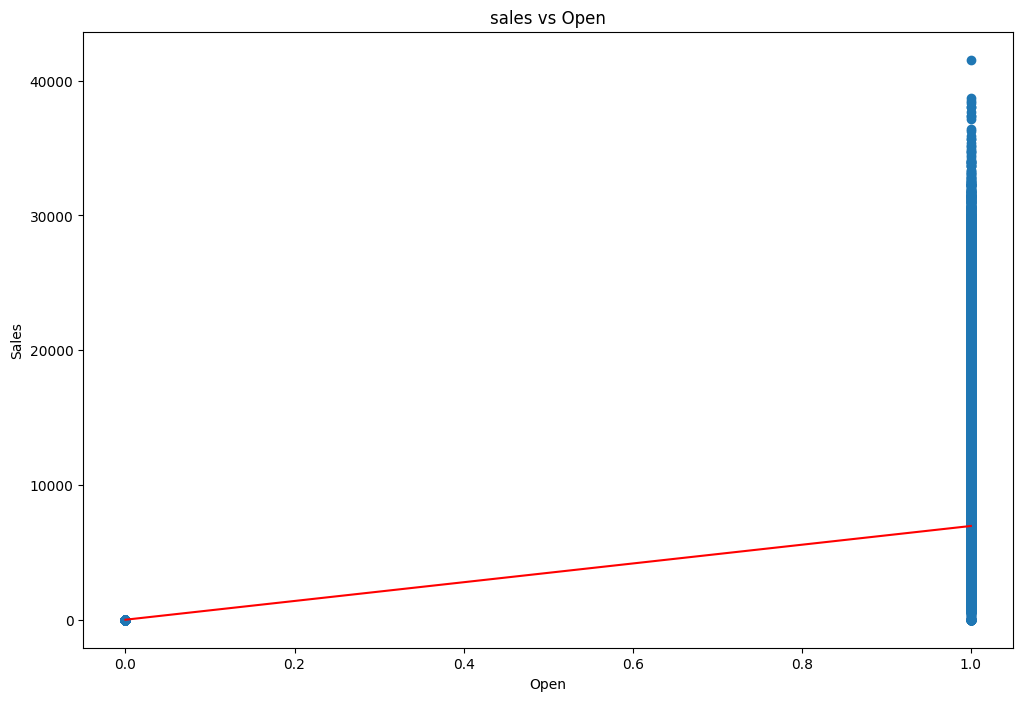

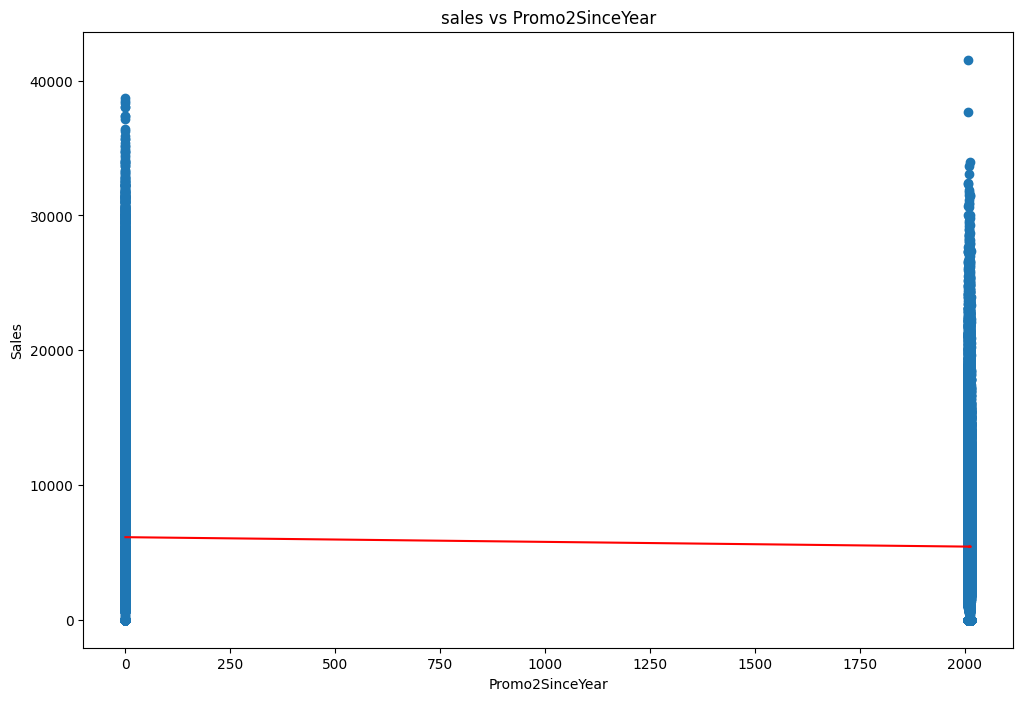

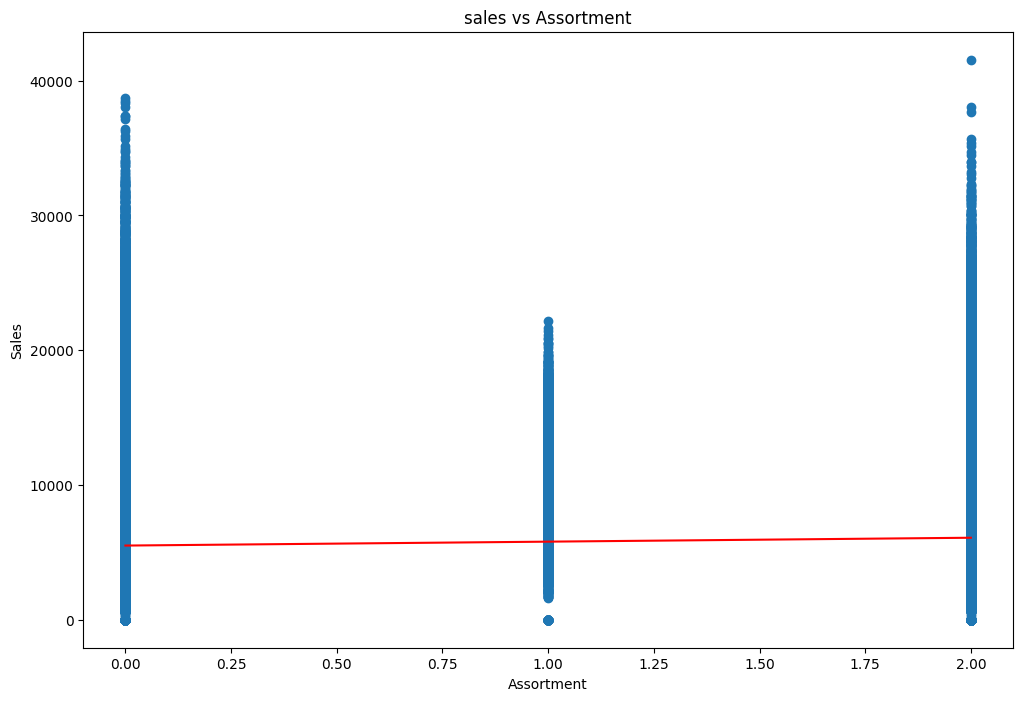

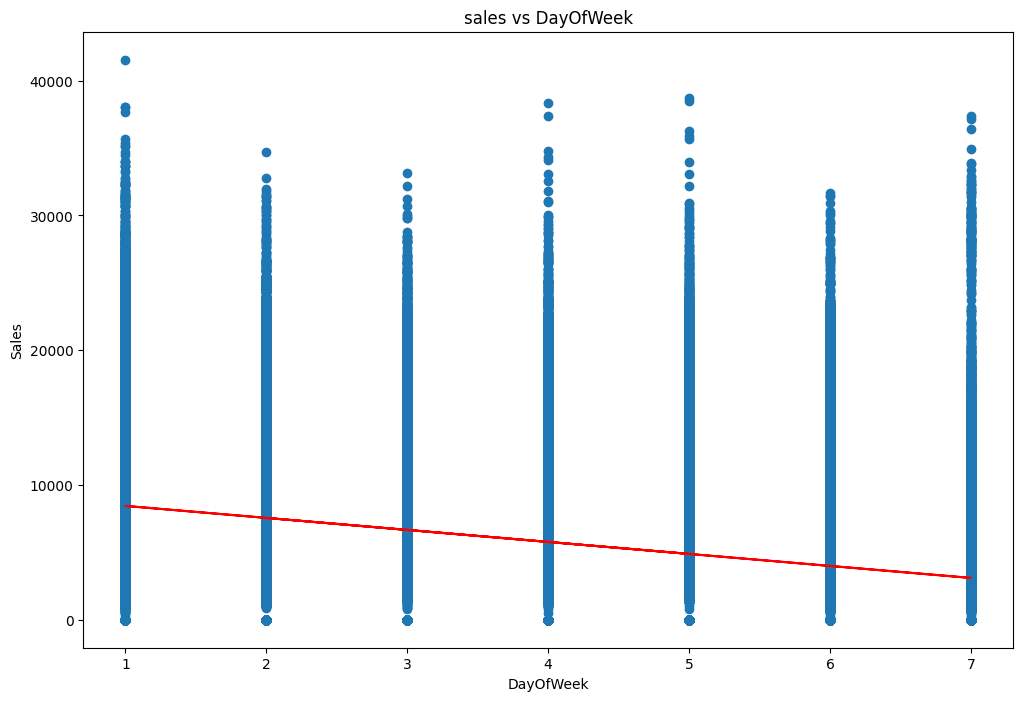

In [192]:
for a in independent:
  plt.figure(figsize=(12,8))
  plt.scatter(x=data[a],y=data[dependent])
  plt.xlabel(a)
  plt.ylabel('Sales')
  plt.title('sales vs '+a)
  co=np.polyfit(data[a],data['Sales'],1)
  eq=np.poly1d(co)(data[a])
  plt.plot(data[a],eq,c='r')

###2. import libraries

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge

### 3. Calculation for VIF

In [194]:
def cal_vif(v):
  vif=pd.DataFrame()
  vif['variable']=v.columns
  vif['VIF']=[variance_inflation_factor(v.values,i) for i in range(v.shape[1])]
  return(vif)

In [195]:
cal_vif(data[[i for i in independent]])

,variable,VIF
0,Promo2SinceWeek,3.996618e+00
1,StateHoliday,1.157139e+00
2,CompetitionDistance,1.592240e+00
3,Promo2,1.570377e+06
4,Customers,5.078987e+00
5,SchoolHoliday,1.309190e+00
6,Promo,1.903226e+00
7,CompetitionOpenSinceMonth,6.086478e+00
8,CompetitionOpenSinceYear,8.026908e+00
9,Open,8.481363e+00


In [196]:
cal_vif(data[[i for i in independent if i not in ['Promo2']]])

,variable,VIF
0,Promo2SinceWeek,3.762699
1,StateHoliday,1.157135
2,CompetitionDistance,1.585610
3,Customers,5.076942
4,SchoolHoliday,1.309151
5,Promo,1.903131
6,CompetitionOpenSinceMonth,6.083750
7,CompetitionOpenSinceYear,8.026034
8,Open,8.477808
9,Promo2SinceYear,4.809100


###4. Feature selection

In [197]:
data = pd.get_dummies(data, columns=['PromoInterval'])

In [198]:
dependent='Sales'
not_needed=('Store','Date','StoreType','Promo2')
independent=list(set(data.columns.tolist())-set(not_needed)-{dependent})

In [199]:
independent

['PromoInterval_0',
 'CompetitionDistance',
 'Promo',
 'CompetitionOpenSinceMonth',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'Open',
 'Promo2SinceYear',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'Promo2SinceWeek',
 'StateHoliday',
 'Customers',
 'SchoolHoliday',
 'CompetitionOpenSinceYear',
 'Assortment',
 'PromoInterval_Feb,May,Aug,Nov',
 'DayOfWeek']

In [200]:
dependent

'Sales'

###4. Selecting data

In [201]:
x=data[independent].values
y=data[dependent].values

### 5. Train the data

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)

(813767, 16)
(203442, 16)


### 6. Data Scaling

In [203]:

scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###7.Linear regression

In [204]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### 8. Prediction

In [205]:
y_pred=regressor.predict(x_test)

In [206]:
regressor.score(x_train,y_train)

0.8618137664468122

In [207]:
mse=mean_squared_error(y_pred,y_test)
print('MSE:', mse)
rmse=math.sqrt(mse)
print('RMSE: ', rmse)
r2=r2_score(y_pred,y_test)
print('R Square: ', r2)

MSE: 2033012.197229231
RMSE:  1425.8373670335727
R Square:  0.839984514940286


In [208]:
regressor.coef_

array([-3.19993969e+13,  1.92777344e+02,  6.12566730e+02,  1.49682617e+00,
       -1.88299903e+13,  5.50597733e+02, -6.47953965e+04, -2.89734644e+13,
        1.31220703e+02, -1.06488129e+02,  2.86833521e+03,  2.87332153e+01,
        5.97731934e+01,  2.58119949e+02, -2.05449254e+13, -1.39350878e+02])

### 9. Ridge

In [209]:
ridge=Ridge(alpha=0.5)
ridge.fit(x_train,y_train)


Ridge(alpha=0.5)

In [210]:
y_pred_ridge=ridge.predict(x_test)

In [211]:
ridge.score(x_train,y_train)

0.8617446091383398

In [212]:
mse=mean_squared_error(y_pred_ridge,y_test)
print('MSE:', mse)
rmse=math.sqrt(mse)
print('RMSE: ', rmse)
r2=r2_score(y_pred_ridge,y_test)
print('R Square: ', r2)

MSE: 2034520.948422973
RMSE:  1426.366344395076
R Square:  0.8398120130600351


###10. Lass0

In [213]:
lasso=Lasso(alpha=2)
lasso.fit(x_train,y_train)

Lasso(alpha=2)

In [214]:
y_pred_lasso=lasso.predict(x_test)

In [215]:
lasso.score(x_train,y_train)

0.8614570779672654

In [216]:
mse=mean_squared_error(y_pred_lasso,y_test)
print('MSE:', mse)
rmse=math.sqrt(mse)
print('RMSE: ', rmse)
r2=r2_score(y_pred_lasso,y_test)
print('R Square: ', r2)

MSE: 2039396.0620805507
RMSE:  1428.0742494984463
R Square:  0.8391434020878994


# **Conclusion**

We saw that Sales column contains 1017902 we trained linear model using various algorithms and we got accuracy near about 84% . 
And we used ridge and lasso for better model but its not impacted much.

So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has 172871 rows which is quite large and therefore we decided not to remove those values.we tried taking an optimum parameter so that our model doesnt overfit.


1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.

2)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

3)Plot between Promotion and Sales shows that promotion helps in increasing Sales.

4)Type of Store plays an important role in opening pattern of stores.

5)All Type ‘b’ stores never closed except for refurbishment or other reason.

6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.

7)Asortment Level ‘b’ is only offered at Store Type ‘b’.

8)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***